In [30]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv("Titanic-Dataset.csv")



In [31]:
# handling missing values
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(columns=["Cabin", "PassengerId", "Name", "Ticket"], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4868\3160610582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4868\3160610582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [47]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeGroup
0,0,3,male,22.000000,1,0,7.2500,S,2,YoungAdult
1,1,1,female,38.000000,1,0,71.2833,C,2,Adult
2,1,3,female,26.000000,0,0,7.9250,S,1,YoungAdult
3,1,1,female,35.000000,1,0,53.1000,S,2,YoungAdult
4,0,3,male,35.000000,0,0,8.0500,S,1,YoungAdult
5,0,3,male,29.699118,0,0,8.4583,Q,1,YoungAdult
6,0,1,male,54.000000,0,0,51.8625,S,1,Adult
7,0,3,male,2.000000,3,1,21.0750,S,5,Child
8,1,3,female,27.000000,0,2,11.1333,S,3,YoungAdult
9,1,2,female,14.000000,1,0,30.0708,C,2,Teen


In [ ]:
#Assigning datatypes
titanic["Pclass"] = titanic["Pclass"].astype("category")
titanic["Sex"] = titanic["Sex"].astype("category")
titanic["Embarked"] = titanic["Embarked"].astype("category")

In [ ]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.000000,1,0,7.2500,S,2
1,1,1,female,38.000000,1,0,71.2833,C,2
2,1,3,female,26.000000,0,0,7.9250,S,1
3,1,1,female,35.000000,1,0,53.1000,S,2
4,0,3,male,35.000000,0,0,8.0500,S,1
5,0,3,male,29.699118,0,0,8.4583,Q,1
6,0,1,male,54.000000,0,0,51.8625,S,1
7,0,3,male,2.000000,3,1,21.0750,S,5
8,1,3,female,27.000000,0,2,11.1333,S,3
9,1,2,female,14.000000,1,0,30.0708,C,2


In [56]:
titanic.groupby("FamilySize")["Survived"].mean()*100


FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [52]:
# Grouping survival by genda
titanic.groupby("Sex")["Survived"].mean()*100

C:\Users\user\AppData\Local\Temp\ipykernel_4868\2026800606.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("Sex")["Survived"].mean()*100


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [50]:
# Grouping survival by Pclass
titanic.groupby("Pclass")["Survived"].mean()*100

C:\Users\user\AppData\Local\Temp\ipykernel_4868\3511635582.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("Pclass")["Survived"].mean()*100


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [57]:
titanic["AgeGroup"] = pd.cut(titanic["Age"],bins=[0,12,18,35,60,80],labels=["Child","Teen","YoungAdult","Adult","Senior"])
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,2,YoungAdult
1,1,1,female,38.0,1,0,71.2833,C,2,Adult
2,1,3,female,26.0,0,0,7.9250,S,1,YoungAdult
3,1,1,female,35.0,1,0,53.1000,S,2,YoungAdult
4,0,3,male,35.0,0,0,8.0500,S,1,YoungAdult


In [59]:
titanic.groupby("AgeGroup")["Survived"].mean()*100


C:\Users\user\AppData\Local\Temp\ipykernel_4868\3548739430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("AgeGroup")["Survived"].mean()*100


AgeGroup
Child         57.971014
Teen          42.857143
YoungAdult    35.327103
Adult         40.000000
Senior        22.727273
Name: Survived, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_4868\724009983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=titanic, palette="pastel")


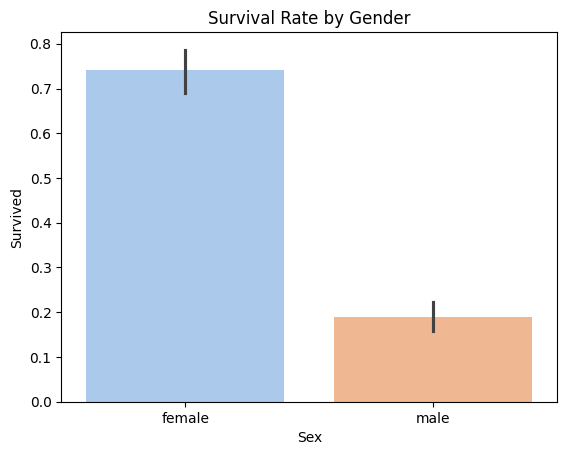

C:\Users\user\AppData\Local\Temp\ipykernel_4868\724009983.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=titanic, palette="cool")


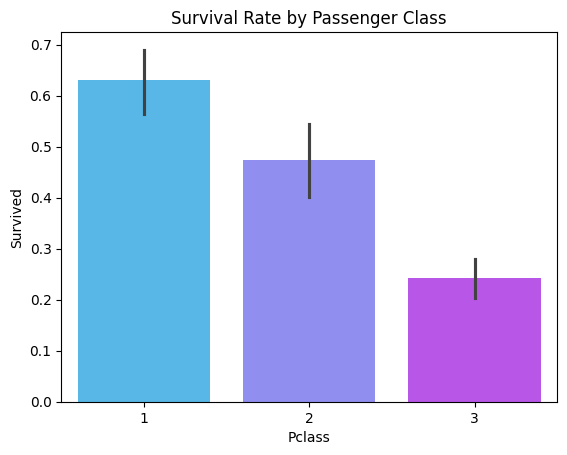

C:\Users\user\AppData\Local\Temp\ipykernel_4868\724009983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AgeGroup", y="Survived", data=titanic, palette="cool")


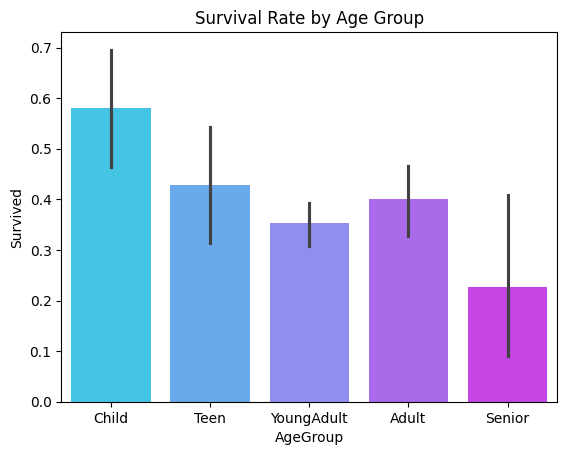

In [62]:
# visualisation
sns.barplot(x="Sex", y="Survived", data=titanic, palette="pastel")
plt.title("Survival Rate by Gender")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=titanic, palette="cool")
plt.title("Survival Rate by Passenger Class")
plt.show()


sns.barplot(x="AgeGroup", y="Survived", data=titanic, palette="cool")
plt.title("Survival Rate by Age Group")
plt.show()
